In [1]:
%matplotlib inline
import json
import pandas as pd

In [2]:
with open("mike/output2.json", "r") as f:
    data = json.loads(f.read())

In [3]:
df = pd.DataFrame(data={
    'title': [e['title'] for e in data],
    'len_html': [len(e['html']) for e in data]})
df.head()

,title,len_html
0,LinkedIn Pulse,49973
1,Drawbridge (company),51967
2,Wikipedia:Content forking,59603
3,Glassdoor,79522
4,Bright.com,55327


In [4]:
print("Number of pages where the title couldn't be extracted:", len(df[df.title.isna()]))

Number of pages where the title couldn't be extracted: 28


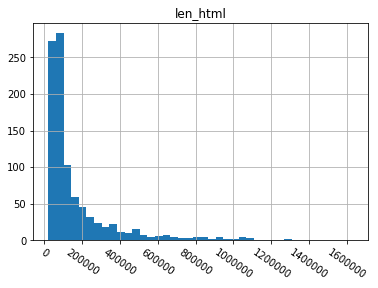

In [5]:
df.hist(xrot=-35, bins=40);

In [6]:
df.sort_values(by='len_html', ascending=False).head(10)

,title,len_html
964,United States,1631403
539,China,1420551
542,Iran,1329114
907,Apple Inc.,1273561
731,United Kingdom,1271607
779,Paris,1212411
360,Global surveillance disclosures (2013–present),1090493
743,Chicago,1075229
738,London,1071864
15,Android (operating system),1065751


In [7]:
import string

def cleanup_key(key):
    return ''.join(k for k in key.lower() if k not in string.punctuation)

def extract_from_table_data(table_datas, key, default_value=None):
    '''
    Iterates over table data and extracts values corresponding to the given key.
    The table data key is not required to exactly match the specified key -
        instead it will be cleaned up with `cleanup_key` and then compared to key.
    If the table doesn't have the given key, then a default value is returned
    '''
    result = []
    for table in table_datas:
        key_found = False
        for row in table:
            if len(row) != 2:
                continue
            ks, vs = row
            if any(cleanup_key(k) == key for k in ks):
                result.append(vs)
                key_found = True
                break
        if not key_found:
            result.append(default_value)
    return result

table_datas = [e.get('table_data', None) for e in data]
founders = extract_from_table_data(table_datas, 'founders')
products = extract_from_table_data(table_datas, 'products')
headquarters = extract_from_table_data(table_datas, 'headquarters')

df2 = pd.DataFrame(data={
    'title': [e['title'] for e in data],
    'founders': founders,
    'products': products,
    'headquarters': headquarters,
    })

# Print out the extracted data, selecting rows where at least one extraction was successful
mask = ~(df2.founders.isna() & df2.products.isna() & df2.headquarters.isna()) & ~df2.title.isna()
print("Pages where something could be extracted:", len(df2[mask]))
df2[mask].head(20)

Pages where something could be extracted: 53


,title,founders,products,headquarters
4,Bright.com,None,None,"[690 5th St, , San Francisco, , , California, ..."
9,LinkedIn,"[Reid Hoffman, Allen Blue, Konstantin Guericke...",[SlideShare],"[Sunnyvale, California, , , U.S.]"
31,Viadeo,"[Dan Serfaty, Thierry Lunati]",None,None
34,FitFinder,[Rich Martell],None,"[University College London, , , London]"
65,Connectix,None,"[\n, Virtual, \n, MODE32, \n, Optima, \n, MAXI...","[San Mateo, ]"
94,Powerset (company),None,None,"[San Francisco, California, , , U.S.]"
101,LinkedIn,"[Reid Hoffman, Allen Blue, Konstantin Guericke...",[SlideShare],"[Sunnyvale, California, , , U.S.]"
108,GreenButton,None,None,"[Wellington, New Zealand, , , New Zealand]"
178,Microsoft Japan,None,None,"[Chōfu, Tokyo, , , Japan]"
181,Microsoft Algeria,None,[Computers & Software],"[Algiers, in , Algeria]"
